In [8]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.5 MB/s eta 0:00:00


In [9]:
import numpy as np
import resampy
import librosa
import os
import soundfile as sf
import pandas as pd

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassanimtiaz5980","key":"2499cf051667a70b38dce37247fc5147"}'}

In [ ]:
import os
os.rename("kaggle (1).json", "kaggle.json")


In [11]:
# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle ! # making the .kaggle folder
!cp kaggle.json ~/.kaggle/  #  put your secret key file kagle.json
!chmod 600 ~/.kaggle/kaggle.json   #  locking it so only i can use this file

In [12]:
# Download the RAVDESS dataset using Kaggle API
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 92% 393M/429M [00:00<00:00, 505MB/s]
100% 429M/429M [00:00<00:00, 452MB/s]


In [13]:
import zipfile

with zipfile.ZipFile('ravdess-emotional-speech-audio.zip', 'r') as zip_ref:
    zip_ref.extractall('ravdess')


In [ ]:
import os

for root, _, files in os.walk('ravdess'):
    for file in files:
        if file.endswith('.wav'):
            print(os.path.join(root, file))
            break


data_dir=os.path.join("content","ravdess")

In [44]:
import os

In [103]:
!ls /content/ravdess


Actor_01  Actor_06  Actor_11  Actor_16	Actor_21
Actor_02  Actor_07  Actor_12  Actor_17	Actor_22
Actor_03  Actor_08  Actor_13  Actor_18	Actor_23
Actor_04  Actor_09  Actor_14  Actor_19	Actor_24
Actor_05  Actor_10  Actor_15  Actor_20	audio_speech_actors_01-24


In [52]:
data_dir=os.path.join("/content/ravdess")


print("data_dir class:", type(data_dir))
print("Data directory:", data_dir)
print()


data_dir class: <class 'str'>
Data directory: /content/ravdess



In [85]:
class_dir=os.listdir(data_dir)
print("Will read data from ",data_dir)

Will read data from  /content/ravdess


In [56]:
actor_dir=[d for d in class_dir if d.startswith("Actor_") and os.path.isdir(os.path.join(data_dir,d))]

print("There are", len(actor_dir), "actors in the dataset.")
print("Actor directories:", actor_dir)

There are 24 actors in the dataset.
Actor directories: ['Actor_17', 'Actor_21', 'Actor_24', 'Actor_22', 'Actor_05', 'Actor_11', 'Actor_04', 'Actor_19', 'Actor_18', 'Actor_23', 'Actor_13', 'Actor_15', 'Actor_16', 'Actor_07', 'Actor_14', 'Actor_01', 'Actor_02', 'Actor_20', 'Actor_08', 'Actor_03', 'Actor_10', 'Actor_06', 'Actor_09', 'Actor_12']


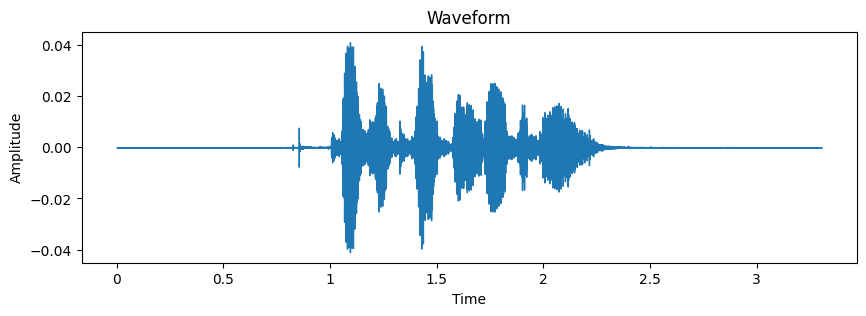

In [78]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
file_path="/content/ravdess/Actor_01/03-01-01-01-01-01-01.wav"
y,sr=librosa.load(file_path)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

**count audion files per Actor**

In [104]:
for actor in sorted(actor_dir):
  actor_path=os.path.join(data_dir,actor)
  wav_files=[f for f in os.listdir(actor_path) if f.endswith(".wav")]
  print("Actor",actor,"has",len(wav_files),"wav files")

Actor Actor_01 has 60 wav files
Actor Actor_02 has 60 wav files
Actor Actor_03 has 60 wav files
Actor Actor_04 has 60 wav files
Actor Actor_05 has 60 wav files
Actor Actor_06 has 60 wav files
Actor Actor_07 has 60 wav files
Actor Actor_08 has 60 wav files
Actor Actor_09 has 60 wav files
Actor Actor_10 has 60 wav files
Actor Actor_11 has 60 wav files
Actor Actor_12 has 60 wav files
Actor Actor_13 has 60 wav files
Actor Actor_14 has 60 wav files
Actor Actor_15 has 60 wav files
Actor Actor_16 has 60 wav files
Actor Actor_17 has 60 wav files
Actor Actor_18 has 60 wav files
Actor Actor_19 has 60 wav files
Actor Actor_20 has 60 wav files
Actor Actor_21 has 60 wav files
Actor Actor_22 has 60 wav files
Actor Actor_23 has 60 wav files
Actor Actor_24 has 60 wav files


#Extract Feature like MFCC, Chroma, Mel

In [ ]:
def extract_features(file_path):
  X, sample_rate=librosa.load(file_path,res_type='kaiser_fast')

  #Extract Features
  mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
  chroma=np.mean(librosa.feature.chroma_stft(y=X,sr=sample_rate).T,axis=0)
  mel=np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)

  return np.hstack([mfccs,chroma,mel])


In [106]:
data = []
labels = []

emotion = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

In [88]:
import os


base_dir = '/content/ravdess'

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.wav'):
            parts = file.split('-')
            try:
                emotion_code = int(parts[2])
                emotion_label = emotion.get(emotion_code)
                if emotion_label is None:
                    continue  # skip unknown emotion codes
            except:
                continue  # skip malformed filenames

            file_path = os.path.join(root, file)
            features = extract_features(file_path)
            if features is not None:
                data.append(features)
                labels.append(emotion_label)


In [107]:
for root, _, files in os.walk('/content/ravdess'):
    for file in files:
        if file.endswith('.wav'):
            parts = file.split('-')
            emotion_code = int(parts[2])
            emotion_label = emotion.get(emotion_code, 'unknown')

            filepath = os.path.join(root, file)

            features = extract_features(file_path)
            data.append(features)
            labels.append(emotion_label)

In [108]:
!ls

'!'		        kaggle.json   ravdess-emotional-speech-audio.zip
 emotion_features.csv   ravdess       sample_data


In [109]:
df=pd.DataFrame(data)
df['labels']=labels
df.to_csv('emotion_features.csv',index=False)
print("Saved all features with emotion labels to 'all_emotion_features.csv'")

Saved all features with emotion labels to 'all_emotion_features.csv'


In [110]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,labels
0,-628.423950,71.823265,3.100013,19.572556,9.635880,9.022594,9.414989,-3.085639,-9.131564,8.447961,...,0.000016,0.000014,0.000012,0.000014,0.000013,0.000004,4.240441e-07,2.019719e-08,1.063755e-09,neutral
1,-435.661377,35.057297,-8.425894,11.188873,-0.842001,6.655818,-1.734082,1.331836,-8.471194,6.216380,...,0.016836,0.011611,0.007806,0.005089,0.001576,0.000433,5.963890e-05,5.424370e-06,2.068020e-07,fearful
2,-556.891602,44.362152,1.242800,16.261635,-2.510679,13.024461,-2.505990,-2.787434,-9.724454,5.876904,...,0.000334,0.000318,0.000186,0.000080,0.000032,0.000009,2.594656e-06,3.096257e-07,1.102683e-08,surprised
3,-644.404663,58.288540,3.313139,19.299717,11.171613,10.345291,3.411453,4.594384,-1.304071,7.556545,...,0.000021,0.000018,0.000014,0.000009,0.000003,0.000001,3.036664e-07,3.115553e-08,9.106774e-10,angry
4,-638.208130,68.423119,10.780132,28.830057,11.801587,13.568628,1.361726,-0.862681,-5.211549,10.154545,...,0.000028,0.000025,0.000025,0.000018,0.000011,0.000004,8.104687e-07,4.767324e-08,2.764471e-09,calm


In [113]:
df.columns


Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
            171,      172,      173,      174,      175,      176,      177,
            178,      179, 'labels'],
      dtype='object', length=181)

**Step 3: Train a Machine Learning Model (SVM & CNN)**

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [115]:
data = df.drop('labels', axis=1)
labels = df['labels']

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [116]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

SVM Accuracy: 89.24%


In [123]:
import torch

** Convert data to PyTorch tensors**

In [125]:

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(pd.get_dummies(y_train).values, dtype=torch.float32)
y_test_tensor = torch.tensor(pd.get_dummies(y_test).values, dtype=torch.float32)



**Create DataLoader**

In [126]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [127]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [130]:
import torch.nn as nn

In [32]:
# Define the CNN model
class EmotionCNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * (input_size // 4), 128)  # Divided by 4 due to two pooling layers
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch_size, 1, feature_length)
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



In [33]:
input_size = X_train.shape[1]
input_size

NameError: name 'X_train' is not defined

In [133]:
X_train.shape

(2304, 180)

In [134]:
X_test.shape

(576, 180)

In [135]:
num_classes = len(emotion)
num_classes

8

In [136]:
# Initialize model
input_size = X_train.shape[1]
num_classes = len(emotion)
model = EmotionCNN(input_size, num_classes)


In [137]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [144]:
# Training loop
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

EmotionCNN(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=5760, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=8, bias=True)
)

In [145]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1).to(device)  # [batch, 1, features]
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])  # Convert one-hot to class indices

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.unsqueeze(1).to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            _, true_labels = torch.max(labels.data, 1)
            total += labels.size(0)
            correct += (predicted == true_labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {running_loss/len(train_loader):.4f}, '
          f'Val Loss: {val_loss/len(test_loader):.4f}, '
          f'Val Acc: {100 * correct/total:.2f}%')

Epoch [1/10], Train Loss: 0.2328, Val Loss: 0.5623, Val Acc: 91.67%
Epoch [2/10], Train Loss: 0.2061, Val Loss: 0.6166, Val Acc: 92.19%
Epoch [3/10], Train Loss: 0.2239, Val Loss: 0.5414, Val Acc: 92.71%
Epoch [4/10], Train Loss: 0.2094, Val Loss: 0.4419, Val Acc: 91.84%
Epoch [5/10], Train Loss: 0.2177, Val Loss: 0.4377, Val Acc: 92.71%
Epoch [6/10], Train Loss: 0.2476, Val Loss: 0.6562, Val Acc: 90.97%
Epoch [7/10], Train Loss: 0.2224, Val Loss: 0.6284, Val Acc: 92.36%
Epoch [8/10], Train Loss: 0.2185, Val Loss: 0.6464, Val Acc: 91.49%
Epoch [9/10], Train Loss: 0.2404, Val Loss: 0.7494, Val Acc: 91.32%
Epoch [10/10], Train Loss: 0.2184, Val Loss: 0.7372, Val Acc: 92.71%


In [146]:

# Save the model
torch.save(model.state_dict(), 'hassan_model.pth')

In [147]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.unsqueeze(1).to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            _, true_labels = torch.max(labels.data, 1)
            total += labels.size(0)
            correct += (predicted == true_labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Assuming you have a DataLoader for your test set
evaluate(model, test_loader)

Test Accuracy: 92.71%


In [ ]:
!npm  install localtunnel
!streamlit  run app.py & npx localtunnel --port 8501
!npm localtunnel --port 8501

In [ ]:

for i  in range(18):
  sample_tensor = X_test_tensor[0].unsqueeze(0).unsqueeze(1)  

  with torch.no_grad():
      output = model(sample_tensor)
      predicted_class = torch.argmax(output, dim=1).item()

   
      emotion = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'calm']
      print("Predicted class:", predicted_class)
      print("Predicted label:", emotion[predicted_class])


Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise
Predicted class: 5
Predicted label: surprise


In [9]:
import soundfile as sf
sf.write(r"C:\Users\Hassan Ali\OneDrive\Desktop\office\Task 2\03-01-03-02-02-01-03.wav", audio, sample_rate)


In [64]:
import sounddevice as sd
import scipy.io.wavfile as wav


duration = 3 
sample_rate = 22050  
print(" Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()
print("Done!")


wav.write("live_audio.wav", sample_rate, audio)


 Recording...
Done!


In [ ]:
def extract_features(file_path):
  X, sample_rate=librosa.load(file_path,res_type='kaiser_fast')


  mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
  chroma=np.mean(librosa.feature.chroma_stft(y=X,sr=sample_rate).T,axis=0)
  mel=np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)

  return np.hstack([mfccs,chroma,mel])

In [41]:
import torch.nn as nn

In [43]:

class EmotionCNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * (input_size // 4), 128)  
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1) 
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [44]:

input_size = 180
num_classes=8

In [45]:
import torch
model = EmotionCNN(input_size ,num_classes)  
model.load_state_dict(torch.load("hassan_model.pth"))
model.eval()


EmotionCNN(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=5760, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=8, bias=True)
)

In [74]:
import os

In [192]:
for root, _, files in os.walk('/content/ravdess'):
    for file in files:
        if file.endswith('.wav'):
            parts = file.split('-')
            emotion_code = int(parts[2])
            emotion_label = emotion.get(emotion_code, 'unknown')

            filepath = os.path.join(root, file)

            features = extract_features(file_path)
            data.append(features)
            labels.append(emotion_label)

In [80]:
emotion = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

In [202]:
import sounddevice as sd
import numpy as np

duration = 7
sample_rate = 22050

print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait() 


audio = np.squeeze(audio)
sf.write('temp.wav', audio, sample_rate)
features = extract_features('temp.wav')


input_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
with torch.no_grad():
    outputs = model(input_tensor)
    predicted_class = torch.argmax(outputs).item()
    
    if predicted_class >=len(emotion):
        print(f"Invalid emotion please setup your voice brother{predicted_class}")
        
    
  
print(f"Live Prediction: {emotion[predicted_class]}")

Recording...
Live Prediction: happy


In [167]:
!pip install pydub



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
